### <b>사이킷런(Scikit-Learn) 소개</b>

* <b>사이킷런(scikit-learn)</b>은 기계 학습을 위한 다양한 기능을 제공하는 파이썬 라이브러리다.
* 가상 데이터(분류 등) 생성 기능을 제공한다.
* 기계 학습을 위해 다양한 기본적인 데이터 세트를 제공한다.
* 다양한 <b>기계 학습</b> 모델(SVM, 랜덤 포레스트 등)을 제공한다.

#### <b>1) 지도 학습(Supervised Learning)이란?</b>

* 데이터에 대하여 <b>정답 레이블(label)</b>이 존재하는 상황에서의 학습 방법이다.
* 지도 학습의 전형적인 예시는 다음과 같다.
  * <b>학습 단계</b>: 이미지 $x$를 보고 레이블 $y$를 예측하도록 학습
  * <b>테스트 단계</b>: 새로운 이미지 $x$가 주어졌을 때, 클래스를 예측하기



#### <b>2) 붓꽃(iris) 품종 예측 데이터 세트</b>

* 붓꽃에 대한 정보가 주어지면, 어떠한 붓꽃 클래스에 해당하는지 맞히는 데이터 세트다.
  * 총 150개의 데이터로 구성된다.
* 대표적인 지도 학습 데이터다.
* <b>입력 데이터</b>는 4개의 특징으로 구성된다.
  * 꽃받침 길이(sepal length)
  * 꽃받침 너비(sepal width)
  * 꽃잎 길이(petal length)
  * 꽃잎 너비(petal width)
* <b>출력 데이터</b>는 3개의 클래스로 구성된다.
  * 부채붓꽃(setosa)
  * 버시컬러(versicolor)
  * 버지니카(virginica)

In [1]:
from sklearn.datasets import load_iris

# 데이터 세트 불러오기
dataset = load_iris()
# 데이터 세트에서 필요한 정보 가져오기
data = dataset["data"]
target = dataset["target"]
feature_names = dataset["feature_names"]
target_names = dataset["target_names"]

print(f"총 데이터 개수: {len(data)}")
print("[입력 특징]")
for i in range(len(feature_names)):
    feature_name = feature_names[i]
    print(f"{i + 1}: {feature_name}")
print("[입력 데이터 예시]")
print(data[:5])
print("[출력 특징]")
for i in range(len(target_names)):
    target_name = target_names[i]
    print(f"{i + 1}: {target_name}")
print("[출력 데이터 예시]")
print(target[:5])

총 데이터 개수: 150
[입력 특징]
1: sepal length (cm)
2: sepal width (cm)
3: petal length (cm)
4: petal width (cm)
[입력 데이터 예시]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[출력 특징]
1: setosa
2: versicolor
3: virginica
[출력 데이터 예시]
[0 0 0 0 0]


### <b>사이킷런(Scikit-Learn) 가상 데이터 생성</b>

* 사이킷런은 <b>가상 데이터(분류 등)</b> 생성 기능을 제공한다.
  * 분류(classification) 모델 학습을 위한 가상 데이터 생성을 진행할 수 있다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 8]

#### <b>1) make_blobs</b>

* 정규 분포를 따르는 <b>가상의 데이터</b>를 생성한다.
* 여러 개의 <b>클러스터</b>가 존재하는 형태로 데이터가 생성된다.
* <b>Reference</b>: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
* <b>파라미터 설명</b>
  * <b>n_samples</b>: 생성할 데이터의 개수 (default: 100)
  * <b>centers</b>: 생성할 클러스터의 수 (default: 3)
  * <b>n_features</b>: 입력 차원 (default: 2)
  * <b>cluster_std</b>: 클러스터의 표준 편차 (default: 1.0)
  * <b>random_state</b>: 랜덤 데이터 생성 시드(seed)
  * <b>return_centers</b>: 클러스터의 중심(center) 값을 반환할지 여부 (default: False)

          x         y  label
0 -1.696210  6.456335      1
1 -0.478076  6.692092      1
2 -5.976190  2.995614      0
3 -6.503688  2.444294      0
4  6.302078 -5.398494      2
데이터의 개수: 100
0   -1.696210
1   -0.478076
2   -5.976190
3   -6.503688
4    6.302078
Name: x, dtype: float64
0    6.456335
1    6.692092
2    2.995614
3    2.444294
4   -5.398494
Name: y, dtype: float64


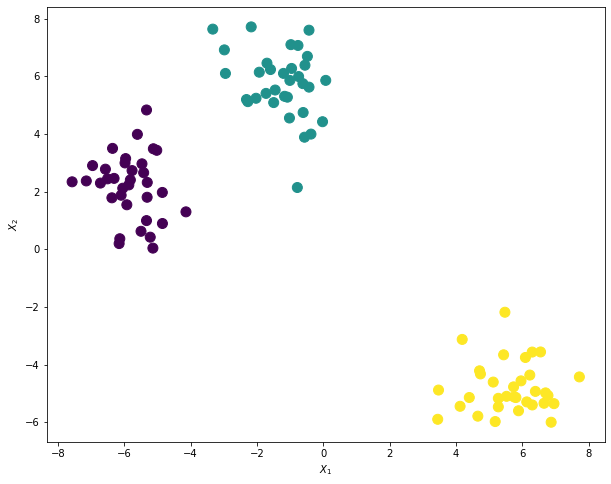

In [3]:
from sklearn.datasets import make_blobs

# 2D data with 3 classes.
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=1234)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
print(df.head())

print("데이터의 개수:", len(df))
print(df["x"].head()) # 데이터 x
print(df["y"].head()) # 데이터 y

plt.scatter(df["x"], df["y"], s=100, c=y)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

#### <b>2) make_moons</b>

* 초승달 모양의 클러스터 두 개를 생성한다.
* 주로 <b>비선형 분류 모델</b>을 평가하기 위한 목적으로 사용된다.
* <b>Reference</b>: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
* <b>파라미터 설명</b>
  * <b>n_samples</b>: 생성할 데이터의 개수
  * <b>noise</b>: 데이터 노이즈 크기로, noise가 클수록 아웃라이어가 생성된다.
     * <b>noise</b>가 0일 때는 정확히 구분되는 두 개의 초승달 형태를 띤다.
  * <b>random_state</b>: 랜덤 데이터 생성 시드(seed)

          x         y  label
0  0.643968  0.745934      0
1  1.521285 -0.361172      1
2  0.718483 -0.510804      1
3  0.703791 -0.535315      1
4  0.126267  1.000489      0
데이터의 개수: 500
0    0.643968
1    1.521285
2    0.718483
3    0.703791
4    0.126267
Name: x, dtype: float64
0    0.745934
1   -0.361172
2   -0.510804
3   -0.535315
4    1.000489
Name: y, dtype: float64


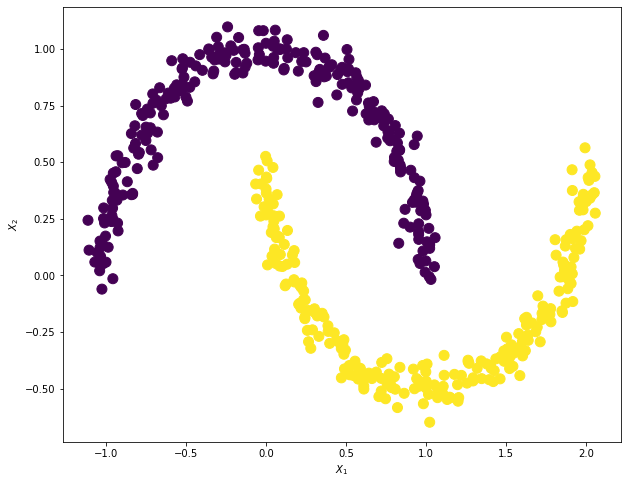

In [4]:
from sklearn.datasets import make_moons

# noise가 0일 때는 정확히 구분되는 달(moon)의 모양, noise가 클수록 아웃라이어 생성
X, y = make_moons(n_samples=500, noise=0.05, random_state=1234)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
print(df.head())

print("데이터의 개수:", len(df))
print(df["x"].head()) # 데이터 x
print(df["y"].head()) # 데이터 y

plt.scatter(df["x"], df["y"], s=100, c=y)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

#### <b>3) make_circles</b>

* 하나의 작은 원을 포함하는 큰 원을 생성한다.
* 클러스터링 혹은 분류 알고리즘을 평가하기 위한 목적으로 사용된다.
* <b>Reference</b>: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
* <b>파라미터 설명</b>
  * <b>n_samples</b>: 생성할 데이터 개수
  * <b>noise</b>: 데이터 노이즈 크기로, noise가 클수록 아웃라이어 생성된다.
     * <b>noise</b>가 0일 때는 정확히 구분되는 두 개의 원(circle) 형태를 띤다.
  * <b>random_state</b>: 랜덤 데이터 생성 시드(seed)

          x         y  label
0 -0.132374  0.991357      0
1 -0.390266 -0.681168      1
2 -0.624518  0.412028      1
3 -0.817616  0.274595      1
4 -0.977889  0.333843      0
데이터의 개수: 500
0   -0.132374
1   -0.390266
2   -0.624518
3   -0.817616
4   -0.977889
Name: x, dtype: float64
0    0.991357
1   -0.681168
2    0.412028
3    0.274595
4    0.333843
Name: y, dtype: float64


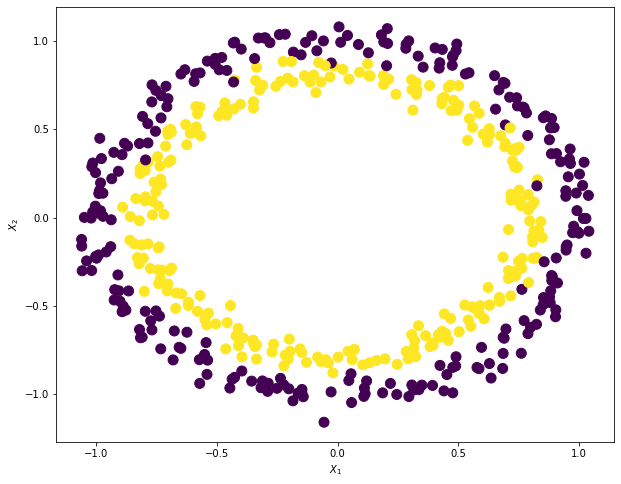

In [5]:
from sklearn.datasets import make_circles

# noise가 0일 때는 정확히 구분되는 원(circle)의 모양, noise가 클수록 아웃라이어 생성
X, y = make_circles(n_samples=500, noise=0.05, random_state=1234)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
print(df.head())

print("데이터의 개수:", len(df))
print(df["x"].head()) # 데이터 x
print(df["y"].head()) # 데이터 y

plt.scatter(df["x"], df["y"], s=100, c=y)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

#### <b>4) make_regression</b>

* <b>회귀 문제(regression problem)</b>를 위한 가상 데이터를 생성한다.
* 직선 형태의 분포를 가지는 데이터가 생성된다.
* <b>Reference</b>: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
* <b>파라미터 설명</b>
  * <b>n_samples</b>: 생성할 데이터 개수 (default: 100)
  * <b>n_features</b>: 입력 차원 (default: 100)
  * <b>n_targets</b>: 출력 차원 (default: 1)
  * <b>noise</b>: 데이터 노이즈 크기로, noise가 클수록 아웃라이어 생성된다.
  * <b>random_state</b>: 랜덤 데이터 생성 시드(seed)

          x           y
0 -0.014279   -2.242057
1  1.391986  116.685109
2  1.850398  150.804047
3  0.121172   12.758387
4 -1.817027 -154.877159
데이터의 개수: 500
0   -0.014279
1    1.391986
2    1.850398
3    0.121172
4   -1.817027
Name: x, dtype: float64
0     -2.242057
1    116.685109
2    150.804047
3     12.758387
4   -154.877159
Name: y, dtype: float64


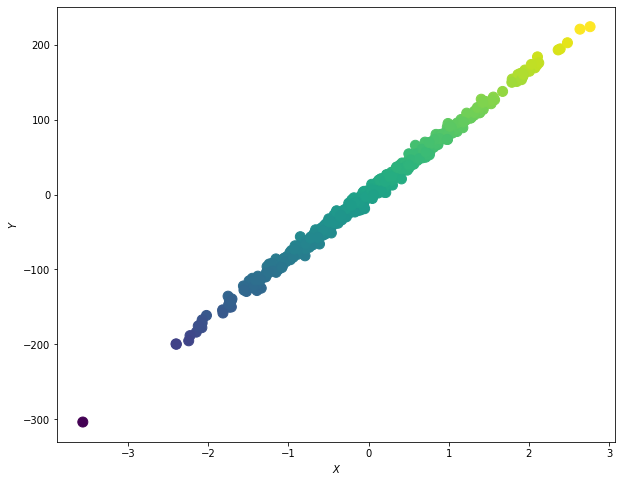

In [6]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=500, noise=5, n_features=1, random_state=1234)
df = pd.DataFrame(dict(x=X[:,0], y=y))
print(df.head())

print("데이터의 개수:", len(df))
print(df["x"].head()) # 데이터 x
print(df["y"].head()) # 데이터 y

plt.scatter(df["x"], df["y"], s=100, c=y)
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.show()

### <b>사이킷런(Scikit-Learn) 학습 데이터와 테스트 데이터 분할</b>

#### <b>1) 오버피팅(Overfitting)</b>

* 머신러닝 모델을 <b>① 학습</b>한 뒤에 <b>② 테스트</b>할 수 있다.
* 우리는 학습 데이터(training data)에서 매우 높은 성능을 보이는 딥러닝 모델을 만들 수 있다.
* 하지만, 실질적으로 테스트 단계에서는 좋은 정확도를 얻지 못하는 경우가 많다.
* 이러한 문제를 어떻게 해결할 수 있을까?
  * 이것을 <b>오버피팅(overfitting)</b>이라고 한다.

#### <b>2) 검증 데이터 세트</b>

* 머신러닝 모델을 <b>① 학습</b> 및 <b>② 검증</b>한 뒤에 <b>③ 테스트</b>하면 어떨까?
* 학습(training) 데이터 세트를 이용해서 학습을 진행하되, 별도의 검증 데이터 세트에 대해서 가장 정확도가 높을 때의 모델을 저장한다.
  * <b>검증 정확도가 제일 높은 모델</b>을 "최종적으로" 사용한다.
* <b>사용 사례 1)</b> 학습 데이터 세트 / 테스트 데이터 세트
* <b>사용 사례 2)</b> 학습 데이터 세트 / 검증 데이터 세트 / 테스트 데이터 세트

#### <b>3) 데이터 세트의 구분</b>

* <b>학습 데이터 세트</b>
  * 모델을 실질적으로 학습하기 위해 사용하는 데이터 세트다.
  * 일반적으로 전체 데이터 세트에서 60%~80% 정도를 학습 데이터 세트로 사용한다.
* <b>검증 데이터 세트</b>
  * 학습된 모델을 검증(validation)하기 위해 사용하는 데이터 세트다.
  * 검증용 데이터에 대하여 높은 성능이 나오는 것이 목적이다.
  * 네트워크의 하이퍼 파라미터를 조절하여 검증용 데이터에 높은 성능이 나오도록 한다.
* <b>테스트 데이터 세트</b>
  * 학습된 모델을 최종적으로 테스트하기 위해 사용하는 데이터 세트다.
  * 학습된 모델이 과대적합(overfitting)되어 학습용/검증용 데이터에 대해서만 잘 동작하는 경우가 있다.
  * 테스트 데이터를 이용해 모델에 대하여 최종적으로 성능 평가를 진행할 수 있다.

#### <b>4) 학습 데이터와 테스트 데이터 분할</b>

* 사이킷런(scikit-learn) 라이브러리는 학습/테스트 데이터 분할 기능을 제공한다.
* <b>train_test_split()</b> 함수를 사용할 수 있다.
* <b>Reference</b>: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* <b>파라미터(parameter)</b>
  * <b>arrays</b>: 분할시킬 데이터(python list, NumPy array, pandas dataframe 등)
  * <b>test_size</b>: 테스트 데이터 세트의 비율 (default: 0.25)
  * <b>shuffle</b>: 데이터 섞기 여부 (default: True)
  * <b>random_state</b>: 랜덤 시드(seed)
    * 학습 데이터는 랜덤으로 생성된다.
* <b>반환(return)</b>
  * (X_train, X_test): 레이블 없이 데이터만 넣었을 때
  * (X_train, X_test, Y_train, Y_test): 데이터와 레이블을 모두 넣었을 때
* <b>사용 예시</b>는 다음과 같다.

<pre>
train_test_split(X, Y, test_size=0.2)
</pre>

* 간단한 데이터 세트를 만들어 <b>분할</b>할 수 있다.

In [7]:
from sklearn.model_selection import train_test_split

X = [
    [0, 1, 2, 3],
    [2, 3, 1, 4],
    [5, 2, 3, 5],
    [3, 5, 2, 1],
    [7, 5, 3, 5]
]
Y = [0, 0, 1, 2, 0]

In [8]:
# 데이터(X)만 입력한 경우
X_train, X_test = train_test_split(X, test_size=0.2, random_state=7777)
print(f"X_train: {X_train}")
print(f"X_test: {X_test}")

X_train: [[5, 2, 3, 5], [7, 5, 3, 5], [2, 3, 1, 4], [0, 1, 2, 3]]
X_test: [[3, 5, 2, 1]]


In [9]:
# 데이터(X)와 레이블(Y)을 모두 넣은 경우
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=7777)
print(f"X_train: {X_train}")
print(f"X_test: {X_test}")
print(f"Y_train: {Y_train}")
print(f"Y_test: {Y_test}")

X_train: [[7, 5, 3, 5], [2, 3, 1, 4], [0, 1, 2, 3]]
X_test: [[3, 5, 2, 1], [5, 2, 3, 5]]
Y_train: [0, 0, 0]
Y_test: [2, 1]


* <b>iris 데이터 세트</b>에 대하여 데이터 세트를 분할할 수 있다.

In [10]:
from sklearn.datasets import load_iris

# 데이터 세트 불러오기
dataset = load_iris()
# 데이터 세트에서 필요한 정보 가져오기
data = dataset["data"]
target = dataset["target"]
feature_names = dataset["feature_names"]
target_names = dataset["target_names"]

print(f"총 데이터 개수: {len(data)}")
print("[입력 특징]")
for i in range(len(feature_names)):
    feature_name = feature_names[i]
    print(f"{i + 1}: {feature_name}")
print("[입력 데이터 예시]")
print(data[:5])
print("[출력 특징]")
for i in range(len(target_names)):
    target_name = target_names[i]
    print(f"{i + 1}: {target_name}")
print("[출력 데이터 예시]")
print(target[:5])

총 데이터 개수: 150
[입력 특징]
1: sepal length (cm)
2: sepal width (cm)
3: petal length (cm)
4: petal width (cm)
[입력 데이터 예시]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[출력 특징]
1: setosa
2: versicolor
3: virginica
[출력 데이터 예시]
[0 0 0 0 0]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data,
    target,
    test_size=0.2,
    random_state=2000
)
print(f"학습 데이터 개수: {len(X_train)}")
print(f"테스트 데이터 개수: {len(X_test)}")

학습 데이터 개수: 120
테스트 데이터 개수: 30


In [12]:
# 학습 데이터의 입력 특징(features) 출력
df = pd.DataFrame(X_train, columns=feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  6.9               3.1                5.4               2.1
1                  6.8               2.8                4.8               1.4
2                  5.5               2.5                4.0               1.3
3                  4.8               3.4                1.6               0.2
4                  7.6               3.0                6.6               2.1
..                 ...               ...                ...               ...
115                5.8               4.0                1.2               0.2
116                5.2               3.4                1.4               0.2
117                6.3               2.7                4.9               1.8
118                6.5               2.8                4.6               1.5
119                6.3               2.5                4.9               1.5

[120 rows x 4 columns]


In [13]:
# 학습 데이터의 정답 레이블 카테고리(category) 출력
series = pd.Series(Y_train, dtype="category")
series = series.cat.rename_categories(target_names)
print(series)

0       virginica
1      versicolor
2      versicolor
3          setosa
4       virginica
          ...    
115        setosa
116        setosa
117     virginica
118    versicolor
119    versicolor
Length: 120, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [14]:
# 테스트 데이터의 입력 특징 출력
df = pd.DataFrame(X_test, columns=feature_names)
print(df)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.8                1.5               0.3
1                 5.4               3.0                4.5               1.5
2                 5.2               3.5                1.5               0.2
3                 5.6               2.7                4.2               1.3
4                 6.4               2.8                5.6               2.1
5                 7.2               3.0                5.8               1.6
6                 6.3               2.9                5.6               1.8
7                 6.0               2.7                5.1               1.6
8                 4.6               3.1                1.5               0.2
9                 4.9               3.1                1.5               0.2
10                5.8               2.7                3.9               1.2
11                5.1               3.5                1.4               0.2

In [15]:
# 테스트 데이터의 정답 레이블 출력
series = pd.Series(Y_test, dtype="category")
series = series.cat.rename_categories(target_names)
print(series)

0         setosa
1     versicolor
2         setosa
3     versicolor
4      virginica
5      virginica
6      virginica
7     versicolor
8         setosa
9         setosa
10    versicolor
11        setosa
12     virginica
13    versicolor
14     virginica
15     virginica
16     virginica
17    versicolor
18        setosa
19     virginica
20    versicolor
21        setosa
22    versicolor
23     virginica
24    versicolor
25        setosa
26     virginica
27     virginica
28    versicolor
29     virginica
dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


### <b>사이킷런(Scikit-Learn) ROC 커브(Curve)</b>

#### <b>1) 분류 모델의 판단</b>

* 하나의 제품이 주어졌을 때, 이상 탐지(결함 탐지)를 수행한다고 가정하자.
  * 불량품에 대하여 양성 판정을 해야 한다.
  * 전체적으로 분류 기능을 잘 수행하는지에 대한 <b>평가 척도(metric)</b>가 필요할 것이다.
* <b>TP (True Positive)</b>: 올바르게 "양성"이라고 판단
* <b>FP (False Positive)</b>: 실수로 "양성"이라고 판단 (정답은 "음성")
* <b>TN (True Negative)</b>: 올바르게 "음성"이라고 판단
* <b>FN (False Negative)</b>: 실수로 "음성"이라고 판단 (정답은 "양성")

#### <b>2) 민감도(Sensitivity)와 특이도(Specificity)</b>

* <b>Reference</b>: https://en.wikipedia.org/wiki/Sensitivity_and_specificity
* <b>민감도(Sensitivity)</b> = TPR (True Positive Rate) = TP / (TP + FN)
  * 실제로 양성인 것들에 대하여 양성 판정을 정확히 하는지를 의미한다.
  * 높을수록 좋다.
* <b>특이도(Specificity)</b> = TNR (True Negative Rate) = TN / (TN + FP)
  * 실제로 음성인 것들에 대하여 음성 판정을 정확히 하는지를 의미한다.
  * 높을수록 좋다.
* <b>무조건</b> 다 불량품이라고 출력(<b>양성 판정</b>)하는 경우를 생각해 보자.
  * Sensitivity는 항상 1, 하지만 Specififcity는 0 (FP가 증가한다.)
  * 이 경우 TPR = 1, FPR = 1이 된다.
* <b>무조건</b> 다 정상 제품이라고 출력(<b>음성 판정</b>)하는 경우를 생각해 보자.
  * Specificity는 항상 1, 하지만 Sensitivity는 0 (FN가 증가한다.)

#### <b>3) ROC Curve</b>

* <b>ROC (Receiver Operating Characteristic)</b> 곡선(curve)라는 의미를 가진다.
* 사용할 수 있는 모든 threshold에 대하여 TPR과 FPR을 나타낸 것이다.
* <b>TPR (True Positive Rate)</b> = Recall = Sensitivity = TP / (TP + FN)
  * (정답을 맞힌 비율이므로) 높을수록 좋다.
* <b>FPR (False Positive Rate)</b> = (1 - Specififcity) = FP / (TN + FP)
  * (정답을 맞히지 못한 비율이므로) 낮을수록 좋다.
* TPR이 높을수록, FPR도 높아지는 경향이 있다.

<pre>
  △ △ △ △ △ △ △ △ △ △ ○ △ △ ○ △ △ ○ ○ ○ ○ 
 |-----------------------------------------------------------|
0.0                                                         1.0
</pre>

* <b>threshold가 0.5일 때</b>
  * 0.5 이상인 경우, 전부 양성(positive)이라고 판단한다.
  * 모든 positive를 양성으로 정확히 판단한다.
  * TP = 6, FP = 4, TN = 10, FN = 0 (합계는 20)
  * 따라서 TPR = 1 (100%), FPR = 4 / 14 (28.6%)

* <b>threshold가 0.8일 때</b>
  * 0.8 이상인 경우, 전부 양성(positive)이라고 판단한다.
  * 모든 negative를 음성으로 정확히 판단한다.
  * TP = 4, FP = 0, TN = 14, FN = 2 (합계는 20)
  * 따라서 TPR = 4 / 6 (66.6%), FPR = 0 (0%)

#### <b>4) ROC Curve 그리는 방법</b>

* <b>ROC (Receiver Operating Characteristic)</b> 곡선(curve)라는 의미를 가진다.
* 사용할 수 있는 모든 threshold에 대하여 TPR과 FPR을 나타낸 것이다.
* threshold를 바꾸어 가며 <b>(TPR, FPR)</b>을 한 점(point)으로 간주하고, 각 점을 찍어서 그래프로 표현할 수 있다.

#### <b>5) AUC (Area Under Curve)</b>

* 곡선(curve)의 아래쪽에 해당하는 면적(area)을 의미한다.
* AUROC (Area Under ROC)라고 부르기도 한다.
* <b>sklearn</b>의 <b>roc_auc_score 메서드</b>를 사용할 수 있다.
  * 기본적으로 <b>y_real</b>의 값은 0 (음성), 1 (양성)의 값을 사용한다.

In [16]:
from sklearn.metrics import roc_auc_score

# 모델의 예측(prediction)
y_pred = [
    0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45,
    0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95
]
# 정답 레이블(real label)
y_real = [
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 1, 0, 0, 1, 1, 1, 1
]

score = roc_auc_score(y_real, y_pred)
print(f"AUROC score: {score:.6f}")

AUROC score: 0.928571


* <b>AUROC</b>를 직접 계산할 수 있다.
* <b>confusion_matrix() 메서드</b>는 정답(real)과 에측 결과(prediction)가 주어졌을 때 TN, FP, FN, TP를 반환한다.

In [17]:
from sklearn.metrics import confusion_matrix

def get_tpr_fpr(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    # TPR과 FPR 계산
    TPR = TP / (TP + FN) # TPR (Sensitivity)
    FPR = FP / (TN + FP) # FPR (1 - Specificity)
    return TPR, FPR

In [18]:
import numpy as np

y_prob = np.asarray([
    0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45,
    0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95
])
y_real = np.asarray([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 1, 0, 0, 1, 1, 1, 1
])

threshold = 0.5
y_pred = y_prob >= threshold
TPR, FPR = get_tpr_fpr(y_real, y_pred)
print(f"TPR: {TPR * 100.:.4f}%")
print(f"FPR: {FPR * 100.:.4f}%")

TPR: 100.0000%
FPR: 28.5714%


* threshold를 바꾸어 가며 <b>(TPR, FPR)</b>을 한 점(point)으로 간주하고, 각 점을 찍어서 그래프로 표현할 수 있다.
* 이때 (TPR, FPR) 점들이 차지하는 <b>면적(area)</b>을 계산한다.

In [19]:
def get_n_points(y_real, y_prob, n):    
    # 전체 예측 결과를 정렬한 뒤에 고유한(unique) 원소만 추출
    sorted_pred = np.unique(np.sort(y_prob))
    
    # 예측 결과의 개수
    length = len(sorted_pred)
    n = min(length, n)
    step = length / n

    # 최종적으로 선택된 N개의 인덱스(index) 리스트
    indices = []
    current = 0
    for i in range(n):
        index = int(current)
        indices.append(index)
        current += step
    
    # 기본적으로 (FPR=0, TPR=0) 포인트가 존재
    points = [(0.0, 0.0)]
    for index in indices:
        # 최대 N개의 균등하게 얻은 threshold에 대하여 TPR, FPR 계산
        threshold = y_prob[index]
        y_pred = y_prob >= threshold
        TPR, FPR = get_tpr_fpr(y_real, y_pred)
        # 저장할 때는 (x축: FPR, y축: TPR) 형태로 저장
        points.append((FPR, TPR))

    return points


points = get_n_points(y_real, y_prob, 30)
print(points)

[(0.0, 0.0), (1.0, 1.0), (0.9285714285714286, 1.0), (0.8571428571428571, 1.0), (0.7857142857142857, 1.0), (0.7142857142857143, 1.0), (0.6428571428571429, 1.0), (0.5714285714285714, 1.0), (0.5, 1.0), (0.42857142857142855, 1.0), (0.35714285714285715, 1.0), (0.2857142857142857, 1.0), (0.2857142857142857, 0.8333333333333334), (0.21428571428571427, 0.8333333333333334), (0.14285714285714285, 0.8333333333333334), (0.14285714285714285, 0.6666666666666666), (0.07142857142857142, 0.6666666666666666), (0.0, 0.6666666666666666), (0.0, 0.5), (0.0, 0.3333333333333333), (0.0, 0.16666666666666666)]


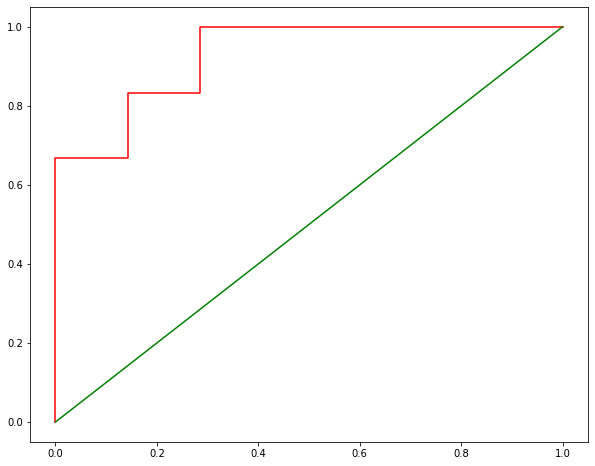

AUROC score: 0.928571


In [38]:
def plot_roc_curve(points):
    # (x축: FPR, y축: TPR)에 대하여 오름차순 정렬
    points = sorted(points)
    plt.plot([point[0] for point in points], [point[1] for point in points], color="red")
    sns.lineplot(x=[0,1], y=[0,1], color="green")
    plt.show()

def get_auroc(points):
    # (x축: FPR, y축: TPR)에 대하여 오름차순 정렬
    points = sorted(points)
    
    # 곡선(curve)은 항상 비내림차순 형태를 보인다.
    area = 0
    cur_x = 0.0
    cur_y = 0.0
    for point in points:
        x, y = point
        if cur_x == x:
            cur_y = y
        else:
            area += (x - cur_x) * cur_y
            cur_x = x
            cur_y = y
    return area
    
plot_roc_curve(points)
area = get_auroc(points)
print(f"AUROC score: {area:.6f}")

### <b>사이킷런(Scikit-Learn) 의사 결정 트리(Decision Tree)</b>

* <b>의사 결정 트리(decision tree)</b>는 예/아니오로 답할 수 있는 질문을 반복하여 분류를 수행한다.
  * 루트 노드(root node)
  * 중간 노드(intermediate node)
  * 단말 노드(terminal node)

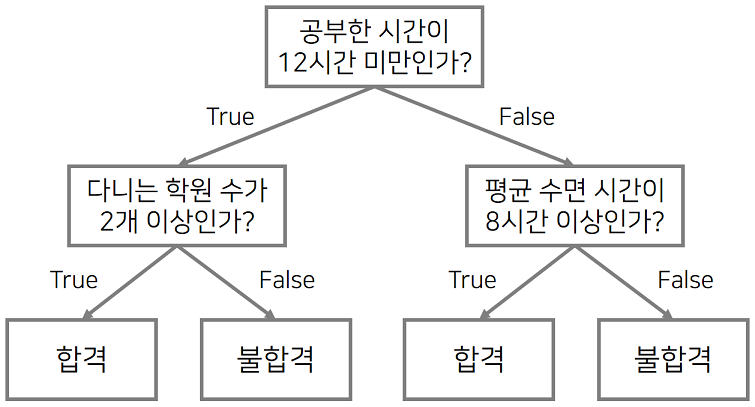

In [54]:
from sklearn.datasets import load_iris

# 데이터 세트 불러오기
dataset = load_iris()
# 데이터 세트에서 필요한 정보 가져오기
data = dataset["data"]
target = dataset["target"]
feature_names = dataset["feature_names"]
target_names = dataset["target_names"]

print(f"총 데이터 개수: {len(data)}")
print("[입력 특징]")
for i in range(len(feature_names)):
    feature_name = feature_names[i]
    print(f"{i + 1}: {feature_name}")
print("[입력 데이터 예시]")
print(data[:5])
print("[출력 특징]")
for i in range(len(target_names)):
    target_name = target_names[i]
    print(f"{i + 1}: {target_name}")
print("[출력 데이터 예시]")
print(target[:5])

총 데이터 개수: 150
[입력 특징]
1: sepal length (cm)
2: sepal width (cm)
3: petal length (cm)
4: petal width (cm)
[입력 데이터 예시]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[출력 특징]
1: setosa
2: versicolor
3: virginica
[출력 데이터 예시]
[0 0 0 0 0]


* 붓꽃(iris) 데이터 세트를 분류하는 예시를 확인해 보자.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data,
    target,
    test_size=0.2,
    random_state=2000
)
print(f"학습 데이터 개수: {len(X_train)}")
print(f"테스트 데이터 개수: {len(X_test)}")

학습 데이터 개수: 120
테스트 데이터 개수: 30


In [56]:
# 학습 데이터의 입력 특징 출력
df = pd.DataFrame(X_train, columns=feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  6.9               3.1                5.4               2.1
1                  6.8               2.8                4.8               1.4
2                  5.5               2.5                4.0               1.3
3                  4.8               3.4                1.6               0.2
4                  7.6               3.0                6.6               2.1
..                 ...               ...                ...               ...
115                5.8               4.0                1.2               0.2
116                5.2               3.4                1.4               0.2
117                6.3               2.7                4.9               1.8
118                6.5               2.8                4.6               1.5
119                6.3               2.5                4.9               1.5

[120 rows x 4 columns]


In [57]:
# 학습 데이터의 정답 레이블 카테고리(category) 출력
series = pd.Series(Y_train, dtype="category")
series = series.cat.rename_categories(target_names)
print(series)

0       virginica
1      versicolor
2      versicolor
3          setosa
4       virginica
          ...    
115        setosa
116        setosa
117     virginica
118    versicolor
119    versicolor
Length: 120, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [58]:
# 데이터 프레임(data frame) 출력
df["target_name"] = series
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,6.9,3.1,5.4,2.1,virginica
1,6.8,2.8,4.8,1.4,versicolor
2,5.5,2.5,4.0,1.3,versicolor
3,4.8,3.4,1.6,0.2,setosa
4,7.6,3.0,6.6,2.1,virginica


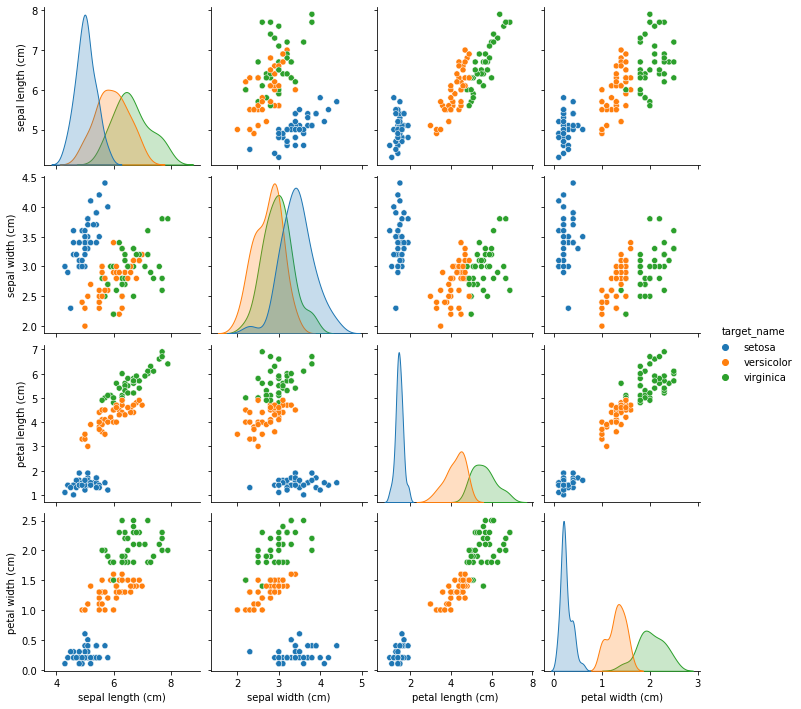

In [59]:
import seaborn as sns

sns.pairplot(df, hue='target_name')
plt.show()

In [60]:
setosa = df[df.target_name == "setosa"]
setosa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
3,4.8,3.4,1.6,0.2,setosa
5,4.8,3.1,1.6,0.2,setosa
14,4.6,3.2,1.4,0.2,setosa
16,5.4,3.7,1.5,0.2,setosa
24,5.1,3.5,1.4,0.3,setosa


In [61]:
others = df[df.target_name != "setosa"]
others.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,6.9,3.1,5.4,2.1,virginica
1,6.8,2.8,4.8,1.4,versicolor
2,5.5,2.5,4.0,1.3,versicolor
4,7.6,3.0,6.6,2.1,virginica
6,6.2,2.2,4.5,1.5,versicolor


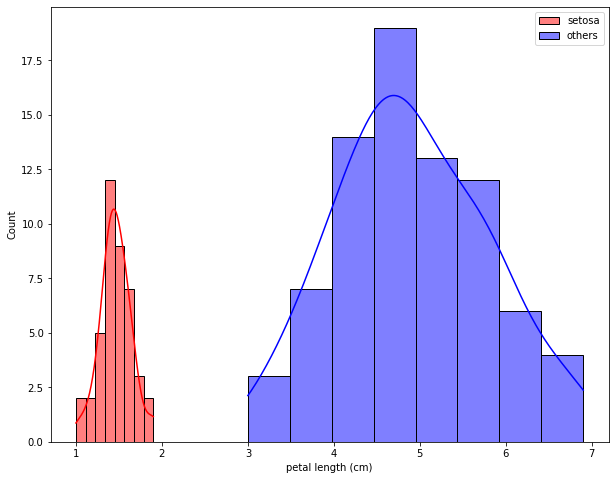

In [62]:
sns.histplot(setosa["petal length (cm)"], label="setosa", color="red", kde=True)
sns.histplot(others["petal length (cm)"], label="others", color="blue", kde=True)
plt.legend()
plt.show()

* 결정 트리(decision tree) 라이브러리를 사용할 수 있다.
  * <b>Reference</b>: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

print("학습 데이터 크기:", X_train.shape)
print("정답 레이블 데이터 크기:", Y_train.shape)

classifier = DecisionTreeClassifier(random_state=2000) # 의사 결정 트리 객체 초기화
classifier.fit(X_train, Y_train) # 학습 진행

pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print(f"예측 정확도: {accuracy * 100.:.4f}%")

학습 데이터 크기: (120, 4)
정답 레이블 데이터 크기: (120,)
예측 정확도: 86.6667%


### <b>사이킷런(Scikit-Learn) 랜덤 포레스트(Random Forest)</b>

* <b>의사 결정 트리(decision tree)</b>를 기본적인 모델로 사용한다.
* 여러 개의 결정 트리를 앙상블(ensemble)하여 정확도를 높인다.
  * 단순히 하나의 트리에 대한 결과만을 활용하지 않고, 여러 트리의 결과를 종합하여 분류한다.

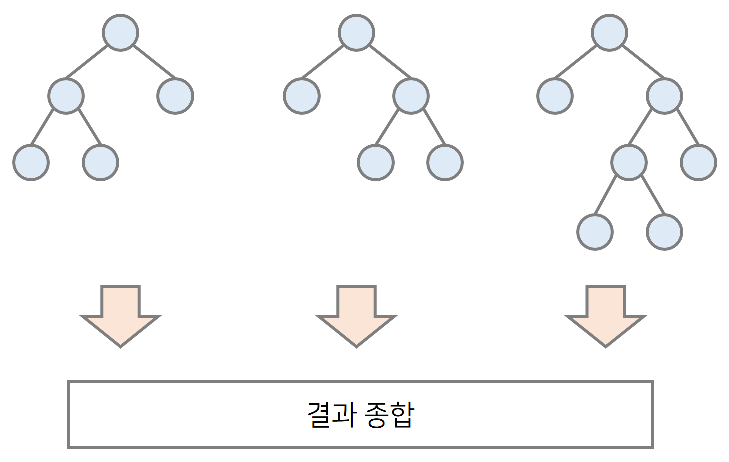

* 랜덤 포레스트(random forest) 라이브러리를 사용할 수 있다.
  * <b>Reference</b>: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* 단순히 하나의 결정 트리를 사용할 때보다 우수한 정확도를 보인다.

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print("학습 데이터 크기:", X_train.shape)
print("정답 레이블 데이터 크기:", Y_train.shape)

classifier = RandomForestClassifier(random_state=2000) # 의사 결정 트리 객체 초기화
classifier.fit(X_train, Y_train) # 학습 진행

pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print(f"예측 정확도: {accuracy * 100.:.4f}%")

학습 데이터 크기: (120, 4)
정답 레이블 데이터 크기: (120,)
예측 정확도: 86.6667%


* 각 트리를 학습하기 위한 데이터를 추출하기 위해 <b>부트스트랩(bootstrap)</b>을 활용한다.
* 일반적으로 각 부트스트랩의 데이터의 개수는 원본 데이터의 개수와 같으며, 각 부트스트랩은 고유한 데이터 구성을 가진다.

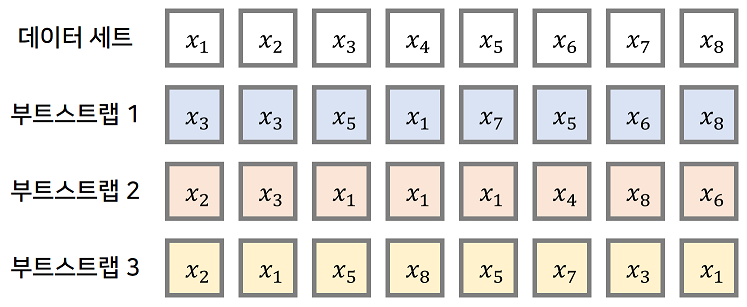

### <b>사이킷런(Scikit-Learn) SVM (Support Vector Machine)</b>

* 서포트 벡터 머신(SVM, Support Vector Machine) 모델 기능을 제공한다.
* 마진을 최대화하는 결정 경계(decision boundary)를 학습한다.
  * <b>마진(margin)</b>은 결정 경계와 서포트 벡터 사이의 거리를 의미한다.
* SVM 라이브러리를 사용할 수 있다.
  * <b>Reference</b>: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

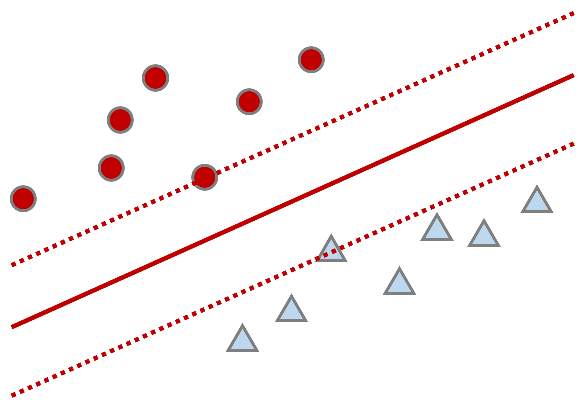

          x         y  label
0  0.643968  0.745934      0
1  1.521285 -0.361172      1
2  0.718483 -0.510804      1
3  0.703791 -0.535315      1
4  0.126267  1.000489      0
데이터의 개수: 500
0    0.643968
1    1.521285
2    0.718483
3    0.703791
4    0.126267
Name: x, dtype: float64
0    0.745934
1   -0.361172
2   -0.510804
3   -0.535315
4    1.000489
Name: y, dtype: float64


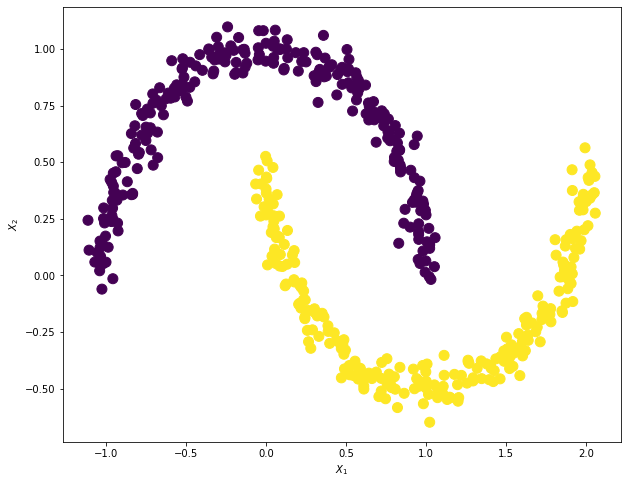

(400, 2) (400,)
(100, 2) (100,)


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# noise가 0일 때는 정확히 구분되는 달(moon)의 모양, noise가 클수록 아웃라이어 생성
X, y = make_moons(n_samples=500, noise=0.05, random_state=1234)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
print(df.head())

print("데이터의 개수:", len(df))
print(df["x"].head()) # 데이터 x
print(df["y"].head()) # 데이터 y

plt.scatter(df["x"], df["y"], s=100, c=y)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

* 학습 데이터에 대하여 <b>오류(error)</b>를 얼마나 허용할 것인지 명시할 수 있다.
* <b>아웃라이어(outlier)</b>가 존재할 수 있는 상황에서도 효과적으로 학습이 가능하다.
  * <b>C</b>: 규제(regularization) 파라미터(parameter)

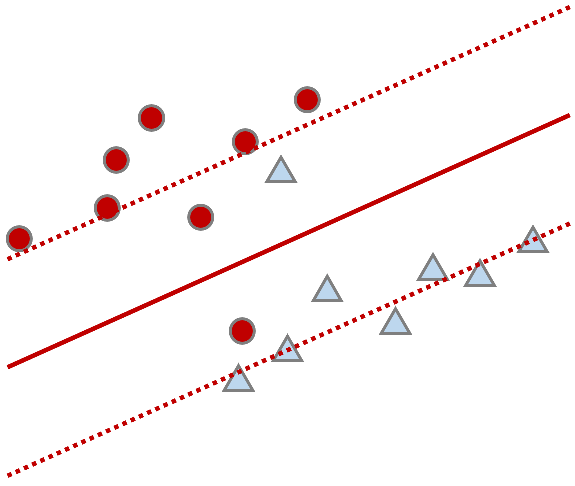

In [33]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

예측 정확도: 92.0000%


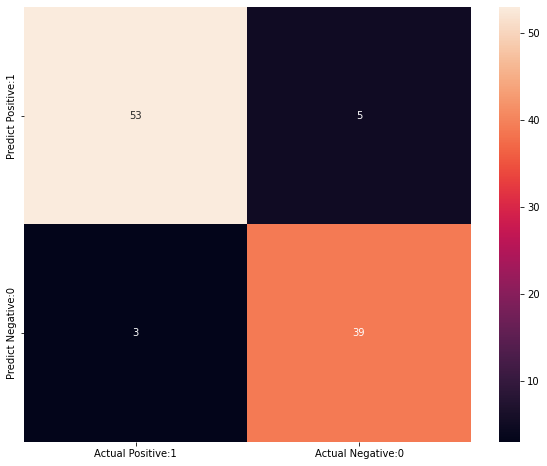

In [34]:
classifier = LinearSVC(C=0.1, random_state=2000, max_iter=5000) # SVM 객체 초기화
classifier.fit(X_train, Y_train) # 학습 진행

pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print(f"예측 정확도: {accuracy * 100.:.4f}%")

pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, pred)

# 혼동 행렬(confusion matrix) 시각화
cm_matrix = pd.DataFrame(data=cm,
                         columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True)

예측 정확도: 100.0000%


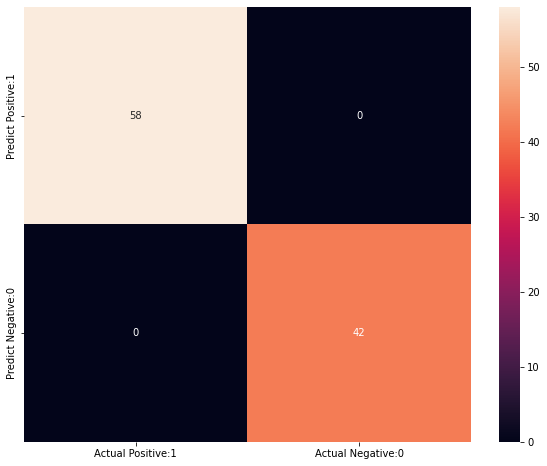

In [35]:
classifier = SVC(C=0.5, kernel="rbf", random_state=2000, max_iter=5000) # SVM 객체 초기화
classifier.fit(X_train, Y_train) # 학습 진행

pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print(f"예측 정확도: {accuracy * 100.:.4f}%")

pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, pred)

# 혼동 행렬(confusion matrix) 시각화
cm_matrix = pd.DataFrame(data=cm,
                         columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True)

### <b>사이킷런(Scikit-Learn) 선형 회귀(Linear Regression)</b>

* <b>선형 회귀</b>: 주어진 데이터를 학습하여 가장 합리적인 선형 함수를 찾아내는 문제다.
* 학습 데이터가 3개 이상일 때 의미가 있다.
* 아래 함수 중에서 데이터를 가장 잘 나타내는 선형 함수는 무엇일까?

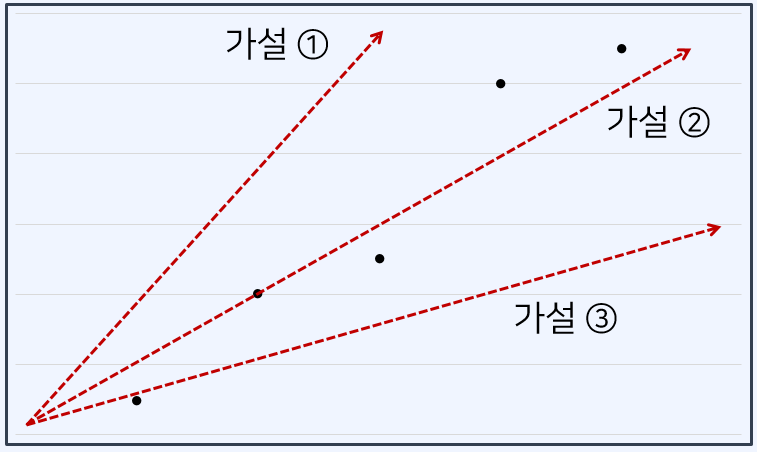

* 선형 함수 모델을 가정하므로, 다음과 같이 모델을 정의할 수 있다.
* 우리의 모델(𝑊와 𝑏)을 수정해 나가면서 가장 합리적인 식을 찾아낼 수 있다.

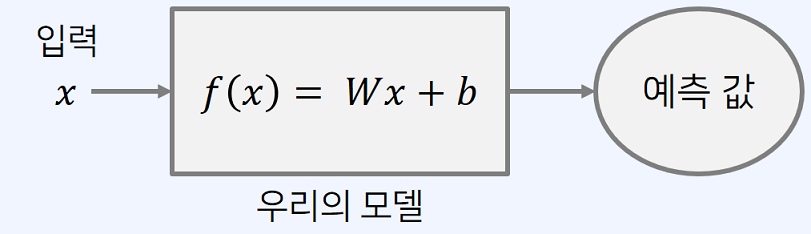

* <b>평균 제곱 오차(mean squared error)</b>를 최소화하는 선형 모델을 찾는 것이 목표다.

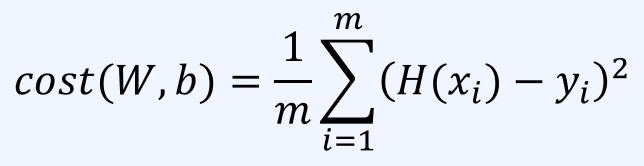

          x           y
0 -0.014279   -2.242057
1  1.391986  116.685109
2  1.850398  150.804047
3  0.121172   12.758387
4 -1.817027 -154.877159
데이터의 개수: 500
0   -0.014279
1    1.391986
2    1.850398
3    0.121172
4   -1.817027
Name: x, dtype: float64
0     -2.242057
1    116.685109
2    150.804047
3     12.758387
4   -154.877159
Name: y, dtype: float64


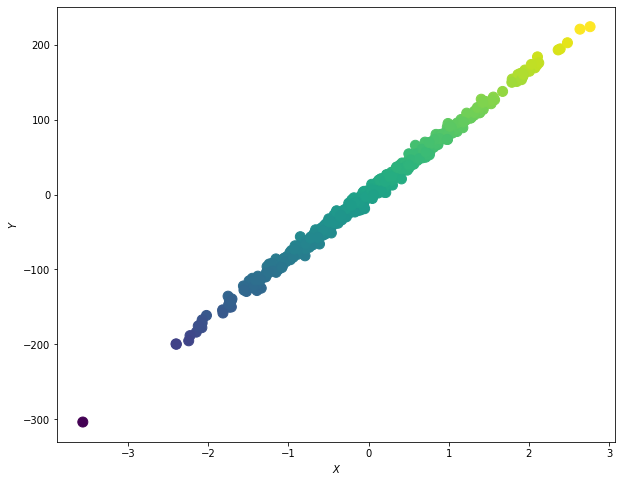

(400, 1) (400,)
(100, 1) (100,)


In [36]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=500, noise=5, n_features=1, random_state=1234)
df = pd.DataFrame(dict(x=X[:,0], y=y))
print(df.head())

print("데이터의 개수:", len(df))
print(df["x"].head()) # 데이터 x
print(df["y"].head()) # 데이터 y

plt.scatter(df["x"], df["y"], s=100, c=y)
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

기울기: [83.33409157]
y 절편: -0.05329972535473004


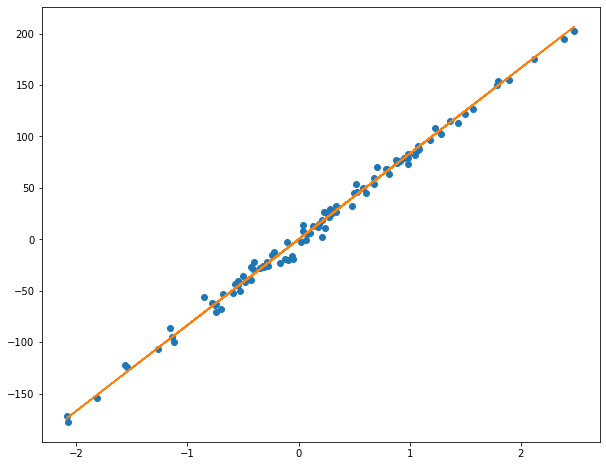

In [37]:
from sklearn.linear_model import LinearRegression

classifier = LinearRegression() # 선형 회귀 모델 객체 초기화
classifier.fit(X_train, Y_train) # 학습 진행

print("기울기:", classifier.coef_)
print("y 절편:", classifier.intercept_)

pred = classifier.predict(X_test)
plt.plot(X_test, Y_test, 'o')
plt.plot(X_test, classifier.predict(X_test.reshape(-1, 1)))
plt.show()